https://www.tutorialguruji.com/python/classification-ann-stuck-at-60/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from google.colab import drive #TODO: COMMENT TO RUN LOCALY
drive.mount('/content/drive')#TODO: COMMENT TO RUN LOCALY

Mounted at /content/drive


In [64]:
# Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/ML (maynooth)/train-io.txt', sep=' ', header=None)#TODO: COMMENT TO RUN LOCALY

#dataset = pd.read_csv('/train-io.txt', sep=' ', header=None) #TODO: UNCOMMENT FOR LOCAL EXECUTION, IF INPUT IN THE SAME DIRECTORY
# Inspect data
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.755260,0.130493,3.94066,0.575958,-3.07717,1.772130,-1.124320,-3.15380,2.371220,-2.752850,0
1,2.124190,-1.272880,1.19663,0.554622,-2.48804,0.578238,0.564368,-2.88063,-0.613447,-0.269964,1
2,0.762264,-0.946171,2.08249,0.723713,-1.85893,0.448780,-0.093424,-0.57777,0.423647,0.077900,1
3,3.720380,0.179464,2.33424,-0.132556,-2.99788,0.045012,-0.403001,-2.24686,0.910226,-0.014559,1
4,4.389430,-0.884852,2.97928,-0.040887,-4.25749,1.564560,-0.312435,-5.11924,0.768608,-2.495500,1


In [67]:
# Print summary statistics
print(dataset.describe())
# Print DataFrame information
print(dataset.describe().info())

                  0              1   ...             9              10
count  100000.000000  100000.000000  ...  100000.000000  100000.000000
mean        2.299265      -0.573524  ...      -1.151174       0.492270
std         1.059917       0.571113  ...       1.187343       0.499943
min        -1.657900      -2.574050  ...      -5.184450       0.000000
25%         1.561450      -0.974358  ...      -1.979262       0.000000
50%         2.302665      -0.573500  ...      -1.148735       0.000000
75%         3.040745      -0.172542  ...      -0.322419       1.000000
max         6.191980       1.369090  ...       3.088490       1.000000

[8 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8 non-null      float64
 1   1       8 non-null      float64
 2   2       8 non-null      float64
 3   3       8 non-null      float64
 4   4       8

In [ ]:
# Segregate features and labels into separate variables
X, y = dataset.iloc[:, 0: 10].values, dataset.iloc[:,10].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 69)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(67000, 10) (33000, 10) (67000,) (33000,)


In [57]:
col_count = X.shape[1]
activator = 'relu'
nodes = 1000 
max_layers = 2
max_epochs = 50
max_batch = 256
loss_funct = 'binary_crossentropy' 
last_act = 'sigmoid'
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

def baseline_model():
    # create model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(nodes, input_dim=col_count, activation=activator))
    for x in range(0, max_layers):
        #model.add(Dropout(0.2))
        model.add(tf.keras.layers.Dense(nodes, input_dim=nodes, activation=activator))    
    #model.add(BatchNormalization())
    model.add(tf.keras.layers.Dense(1, activation=last_act))
    # Compile model
    model.compile(loss=loss_funct, optimizer=adam, metrics=['accuracy'])
    return model

In [58]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=max_epochs, batch_size=max_batch)
estimator.fit(X_train,y_train)

Epoch 1/50
262/262 [==============================] - 17s 64ms/step - loss: 0.6938 - accuracy: 0.5122
Epoch 2/50
262/262 [==============================] - 17s 65ms/step - loss: 0.6918 - accuracy: 0.5240
Epoch 3/50
262/262 [==============================] - 17s 65ms/step - loss: 0.6845 - accuracy: 0.5518
Epoch 4/50
262/262 [==============================] - 17s 65ms/step - loss: 0.6665 - accuracy: 0.5678
Epoch 5/50
262/262 [==============================] - 17s 65ms/step - loss: 0.6530 - accuracy: 0.5741
Epoch 6/50
262/262 [==============================] - 17s 65ms/step - loss: 0.6469 - accuracy: 0.5838
Epoch 7/50
262/262 [==============================] - 17s 66ms/step - loss: 0.6438 - accuracy: 0.5886
Epoch 8/50
262/262 [==============================] - 17s 65ms/step - loss: 0.6394 - accuracy: 0.5976
Epoch 9/50
262/262 [==============================] - 17s 65ms/step - loss: 0.6357 - accuracy: 0.6075
Epoch 10/50
262/262 [==============================] - 17s 66ms/step - loss: 0.629

In [59]:
y_pred = estimator.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
score = np.sum(cm.diagonal())/float(np.sum(cm))
print(score)

sum=0
total=0
for y1,y2 in zip(y_test,y_pred):
  if y1==y2: sum+=1
  total+=1
print(sum, sum/total)

y_pred = estimator.predict(X_train)
sum=0
total=0
for y1,y2 in zip(y_train,y_pred):
  if y1==y2: sum+=1
  total+=1
print(sum, sum/total)

0.8372424242424242
27629 0.8372424242424242
60345 0.9006716417910448


In [60]:
X_assessment = pd.read_csv('/content/drive/MyDrive/ML (maynooth)/test-i.txt', sep=' ', header=None) #TODO:COMMENT
#X_assessment = pd.read_csv('/test-i.txt', sep=' ', header=None) #TODO:UNCOMMENT
X_assessment = sc.transform(X_assessment)
y_pred = estimator.predict(X_assessment)
print(y_pred)

np.savetxt("/content/drive/MyDrive/ML (maynooth)/test-o.txt", y_pred, delimiter="\n",fmt='%d') #TODO:COMMENT
#np.savetxt("/test-o.txt", y_pred, delimiter="\n",fmt='%d') #TODO:UNCOMMENT


[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]


In [ ]:
y_prob = overfit1.predict_proba(X_test)
fpr250, tpr250, thresholds = roc_curve(y_test,y_prob[:,1])
auc_score250=roc_auc_score(y_test,y_prob[:,1])

y_prob = overfit2.predict_proba(X_test)
fpr100, tpr100, thresholds = roc_curve(y_test,y_prob[:,1])
auc_score100=roc_auc_score(y_test,y_prob[:,1])

y_prob = overfit3.predict_proba(X_test)
fpr75, tpr75, thresholds = roc_curve(y_test,y_prob[:,1])
auc_score75=roc_auc_score(y_test,y_prob[:,1])

y_prob = overfit4.predict_proba(X_test)
fpr50, tpr50, thresholds = roc_curve(y_test,y_prob[:,1])
auc_score50=roc_auc_score(y_test,y_prob[:,1])


In [56]:
y_prob = estimator.predict_proba(X_test)
fpr25, tpr25, thresholds = roc_curve(y_test,y_prob[:,1])
auc_score25=roc_auc_score(y_test,y_prob[:,1])
print(auc_score25)

0.874259225666635


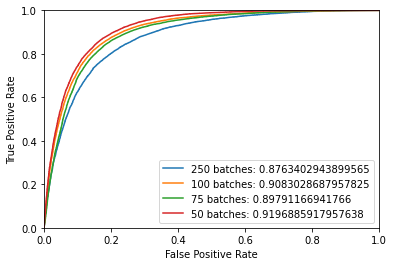

[0.8763402943899565, 0.9083028687957825, 0.89791166941766, 0.9196885917957638]


In [ ]:
fprlist = [fpr250,fpr100,fpr75,fpr50]
tprlist = [tpr250,tpr100,tpr75,tpr50]
batcheslist = [250,100,75,50]
auclist = [auc_score250,auc_score100, auc_score75, auc_score50]
for i in range(len(fprlist)):
  plt.plot(fprlist[i],tprlist[i], label=(str(batcheslist[i])+" batches: "+str(auclist[i]))) 
plt.axis([0,1,0,1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend()
plt.show()    

print(auclist)

In [ ]:
n_e = 3
experts = []
max_epochs = 75
max_batch = 256
nodes = 1000//n_e
for i in range(n_e):
  inputX = X_train[i*len(X_train)//n_e:((i+1)*len(X_train)//n_e)-1]
  inputY = y_train[i*len(y_train)//n_e:((i+1)*len(y_train)//n_e)-1]
  experts.append(KerasClassifier(build_fn=baseline_model, epochs=max_epochs, batch_size=max_batch))
  experts[i].fit(inputX,inputY)

In [ ]:
y1 = experts[0].predict(X_test)
y2 = experts[1].predict(X_test)
y3 = experts[2].predict(X_test)
y_pred = (y1+y2+y3>1.5)

sum=0
total=0
for y1,y2 in zip(y_test,y_pred):
  if y1==y2: sum+=1
  total+=1
print(sum, sum/total)

19878 0.6023636363636363
